# PCA

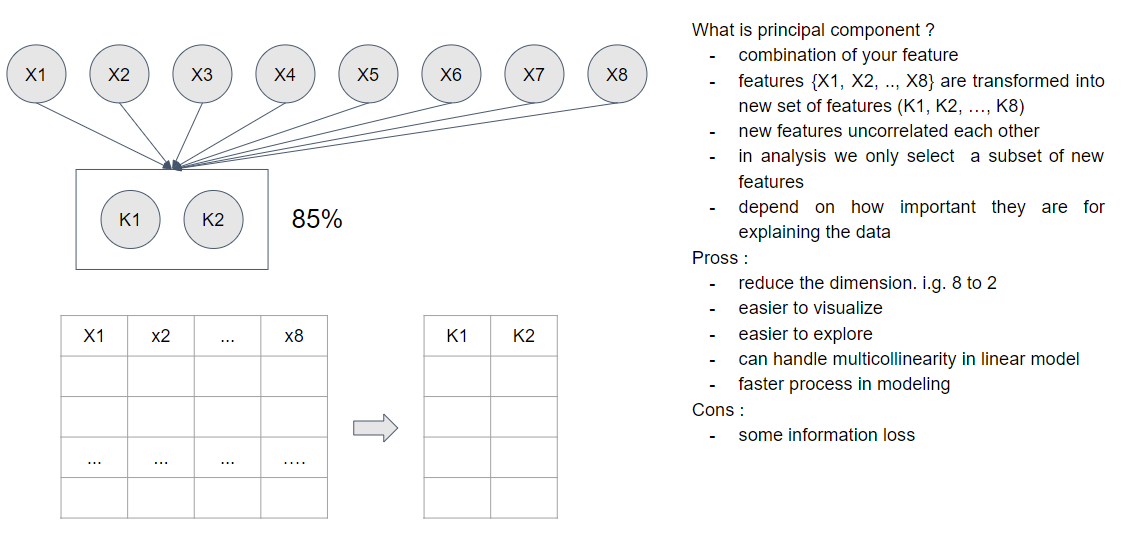

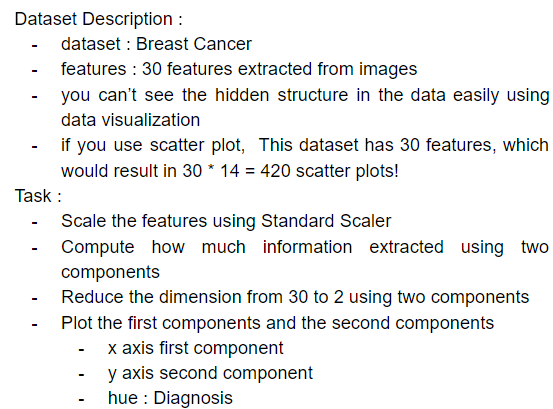

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer = load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
df['target'].value_counts()

,count
target,
1,357
0,212


> ## Scaler

In [ ]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

> ## Information Extracted

In [ ]:
from sklearn.decomposition import PCA

# made 30 components
pca = PCA(n_components = 30)
pca.fit(X_scaled)

# transform the data
X_pca = pca.transform(X_scaled)

In [ ]:
variance = []

for i in range(0,30):
  variance.append(np.var(X_pca[:,i]))

In [ ]:
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted 63.24320765155941 %


> ## Reducing Dimension (30 to 2)

In [ ]:
# only keep two components
pca = PCA(n_components = 2)
pca.fit(X_scaled)

# transform the data
X_pca = pca.transform(X_scaled)

In [ ]:
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


> ## Scatter Plot and Clustering Result

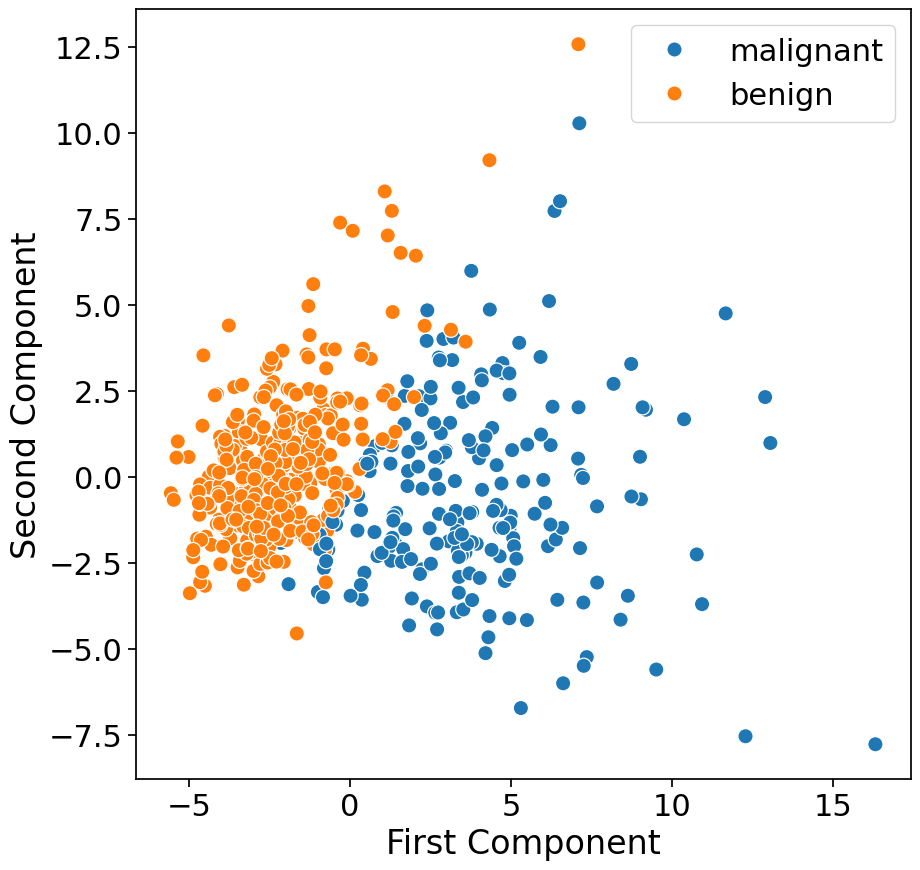

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook', font_scale=2)

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=np.where(cancer.target, 'benign', 'malignant'),
    s=120
)

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

Result :
- Information extracted from 2 component 63.24 %
- We reduce the dimension from 30 to 2 and the lost information is 36.76% but you can see that those two features can separate benign and malignant quiet well
- this also means that you can see hidden structure within the data
- malignant points are more spread than benign point


# Clustering k-Means 1

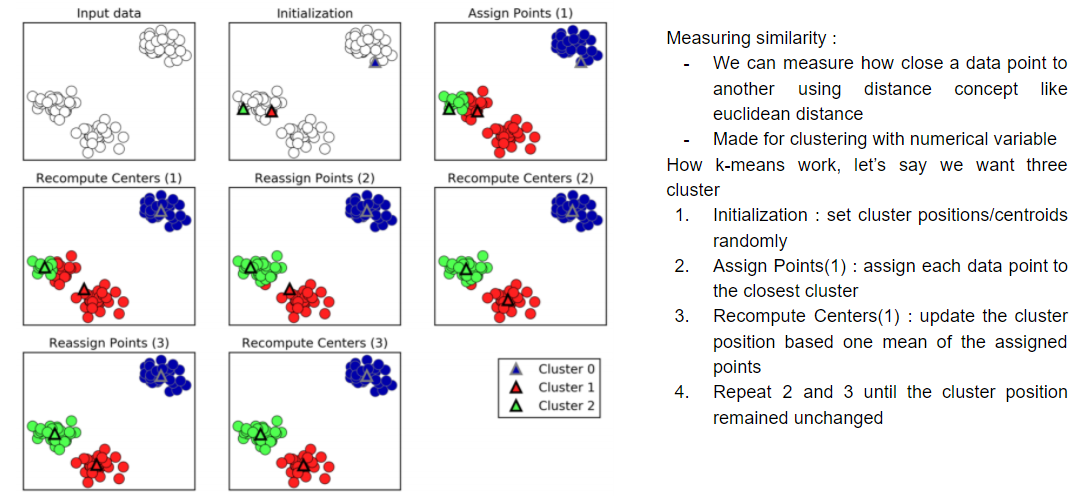

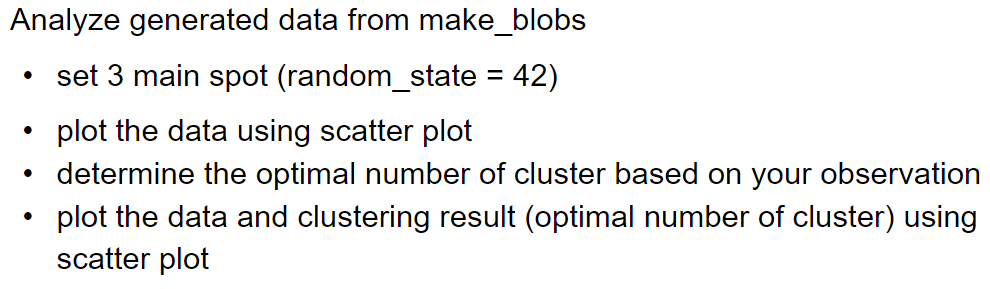

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

> ## Generate Data

In [ ]:
X, y = make_blobs(random_state = 42)

> ## Scatter Plot

<Axes: >

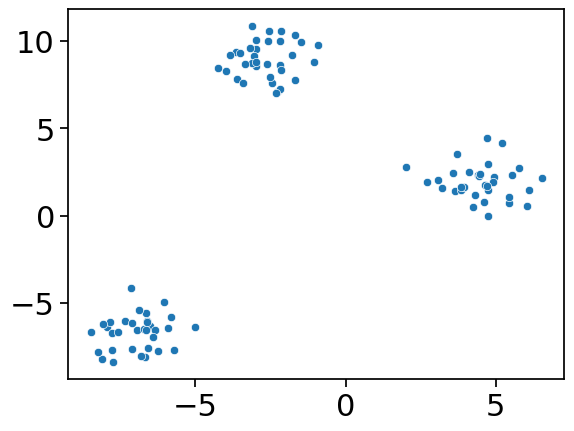

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1])

> ## Fit K-Means

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

> ## Scatterplot and Clustering Result

In [ ]:
kmeans.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

<Axes: >

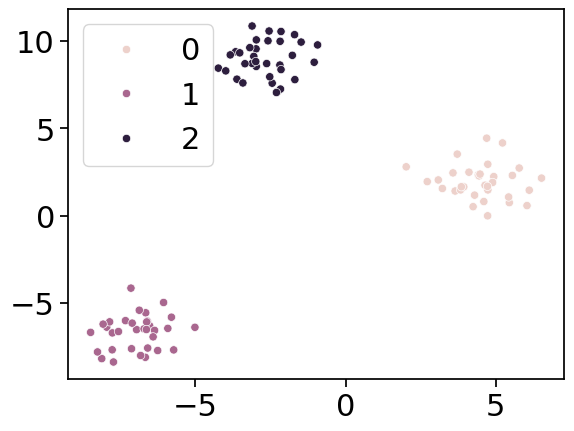

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue = kmeans.labels_)

# Clustering k-Means 2

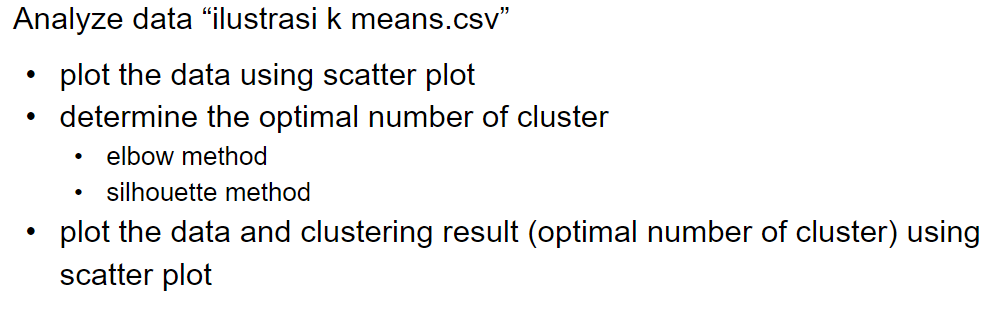

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

> ## Data

In [ ]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [ ]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


Text(0, 0.5, 'Tinggi Badan Istri')

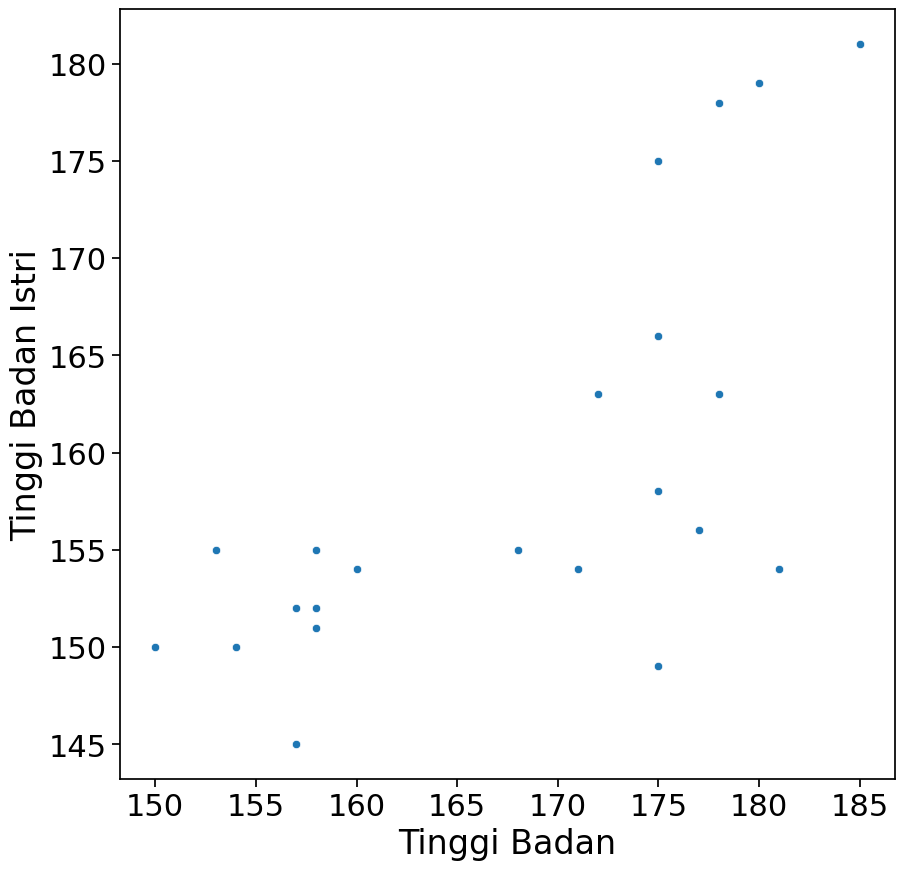

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

> ## Determine The Optimal Number Of Cluster

ELBOW METHOD

In [ ]:
# clustering variation
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(X) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

# within sumsq
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

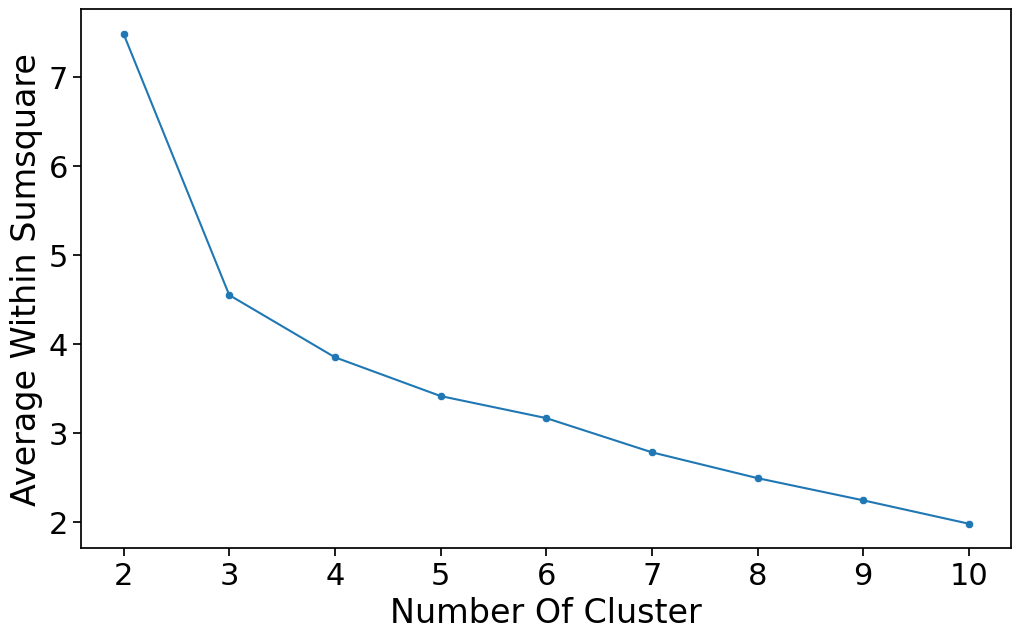

In [65]:
plt.figure(figsize=(12,7))
sns.lineplot(x=number_of_cluster, y=avgWithinSS)
sns.scatterplot(x=number_of_cluster, y=avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

SHILHOUETTE METHOD

In [66]:
  kmeans = KMeans(n_clusters = 2)
  kmeans.fit(X)

KMeans(n_clusters=2)

In [67]:
labels = kmeans.labels_
silhouette_score(X, labels, metric = 'euclidean')

np.float64(0.5354471368277998)

In [68]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean'))

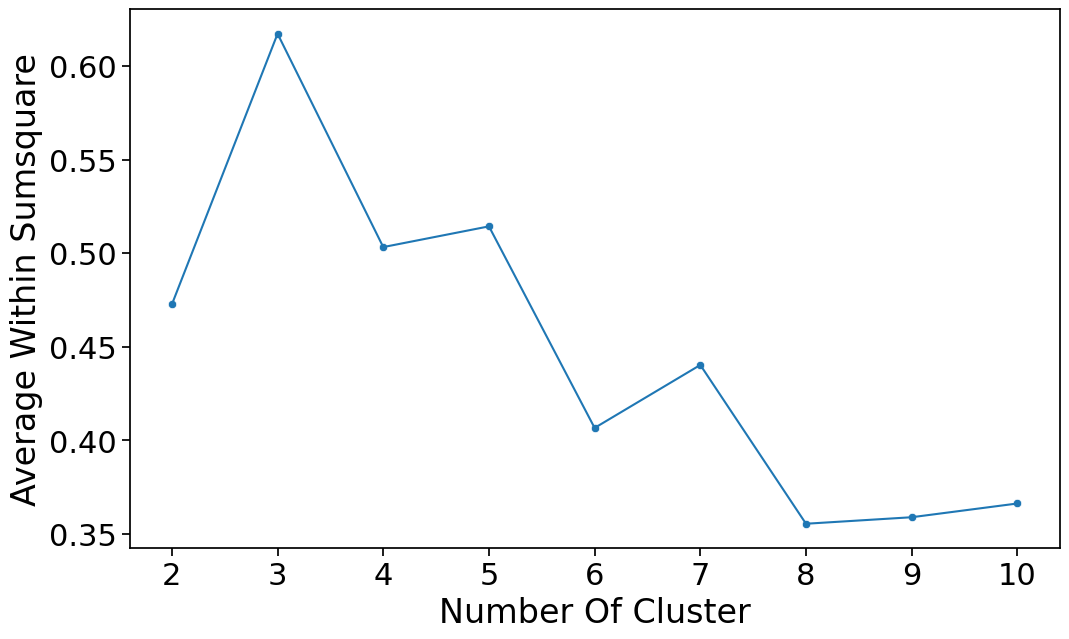

In [70]:
plt.figure(figsize=(12,7))

sns.lineplot(x=number_of_cluster, y=silhouette_scores)
sns.scatterplot(x=number_of_cluster, y=silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

> ## Final Result

In [71]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [74]:
df['cluster'] = kmeans.labels_

Text(0, 0.5, 'Tinggi Badan Istri')

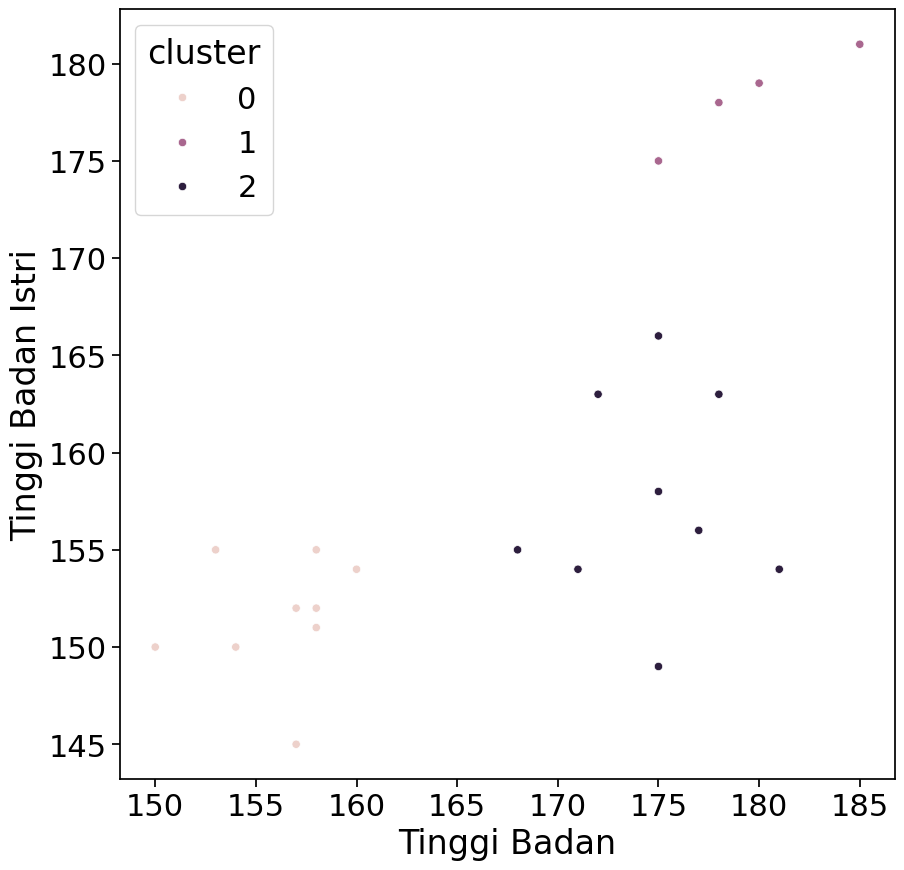

In [75]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    hue = 'cluster',
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

> # Clustering Agglomerative

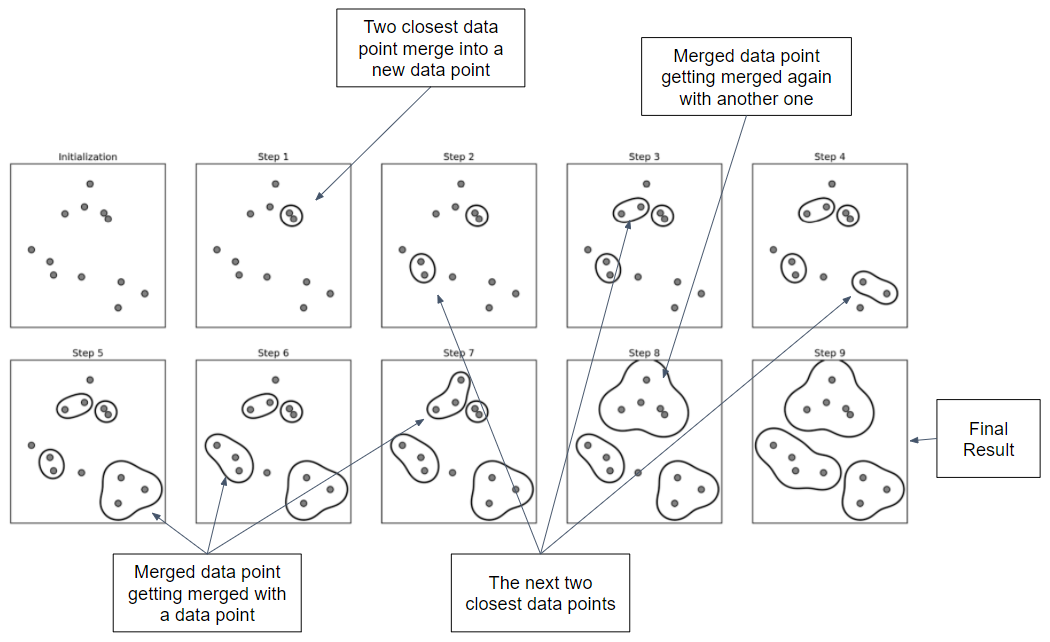

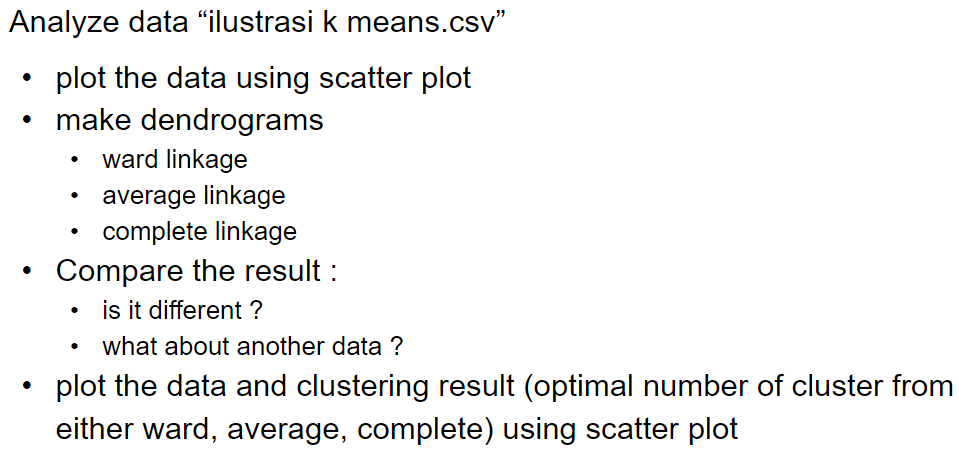

In [76]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
import matplotlib.pyplot as plt

> ## Data

In [77]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [ ]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


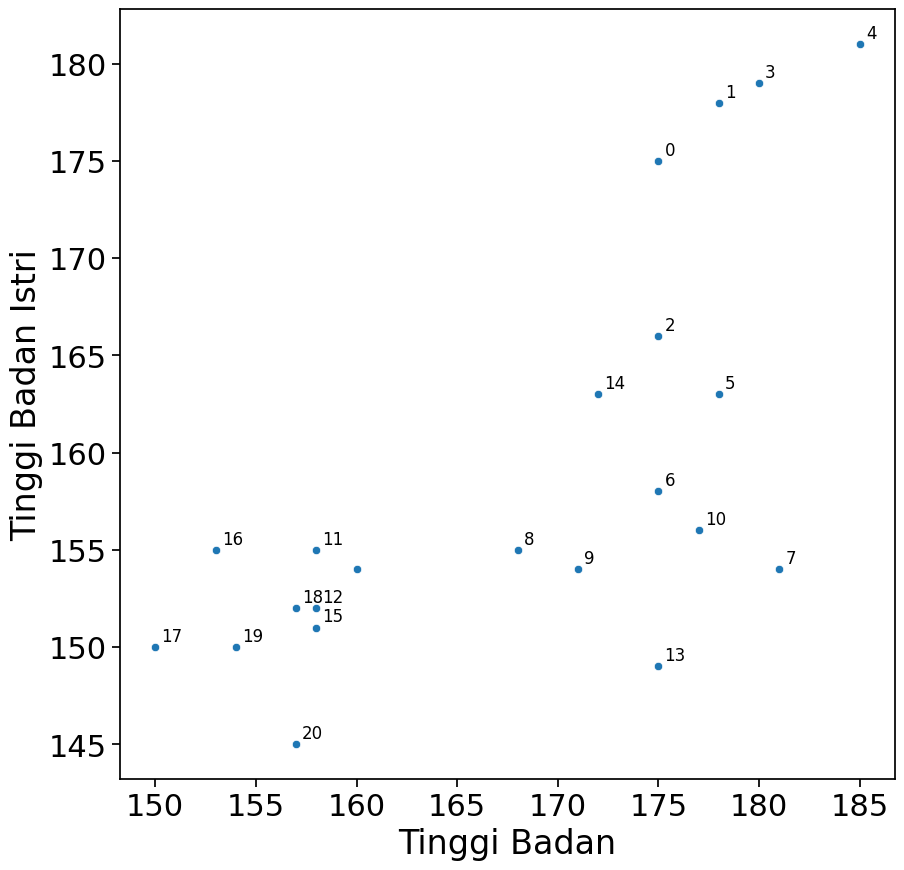

In [78]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0,df.shape[0]-1)):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize = 12)

> ## Dendogram

In [81]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

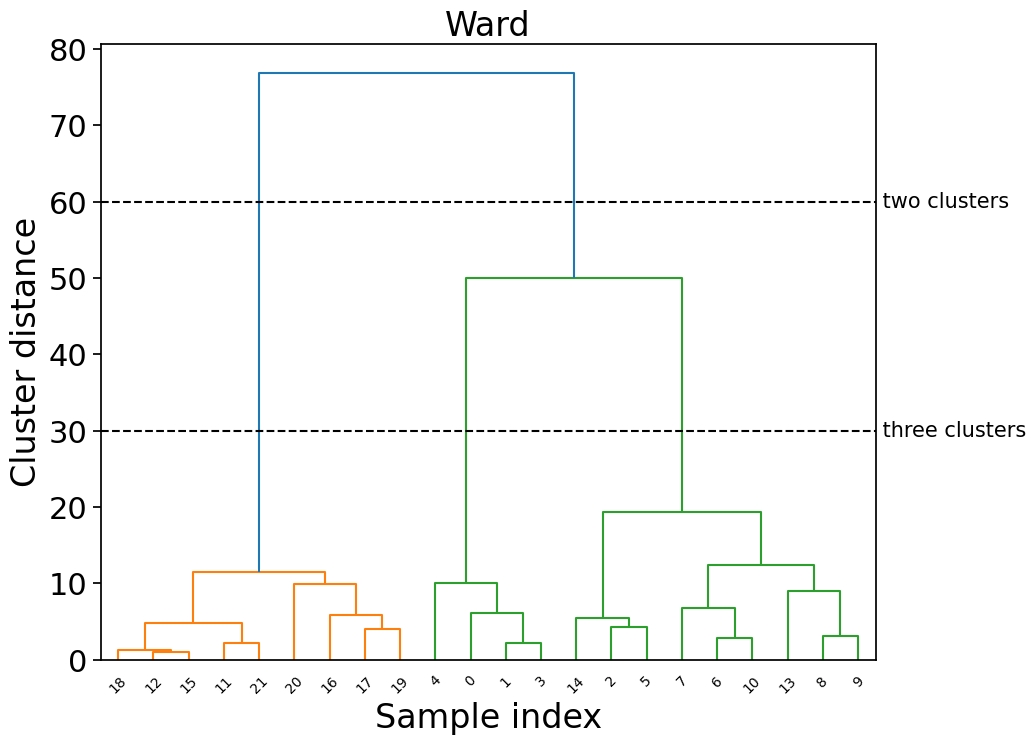

In [82]:
linkage_array = ward(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [60, 60], '--', c='k')
ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1], 60, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 30, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

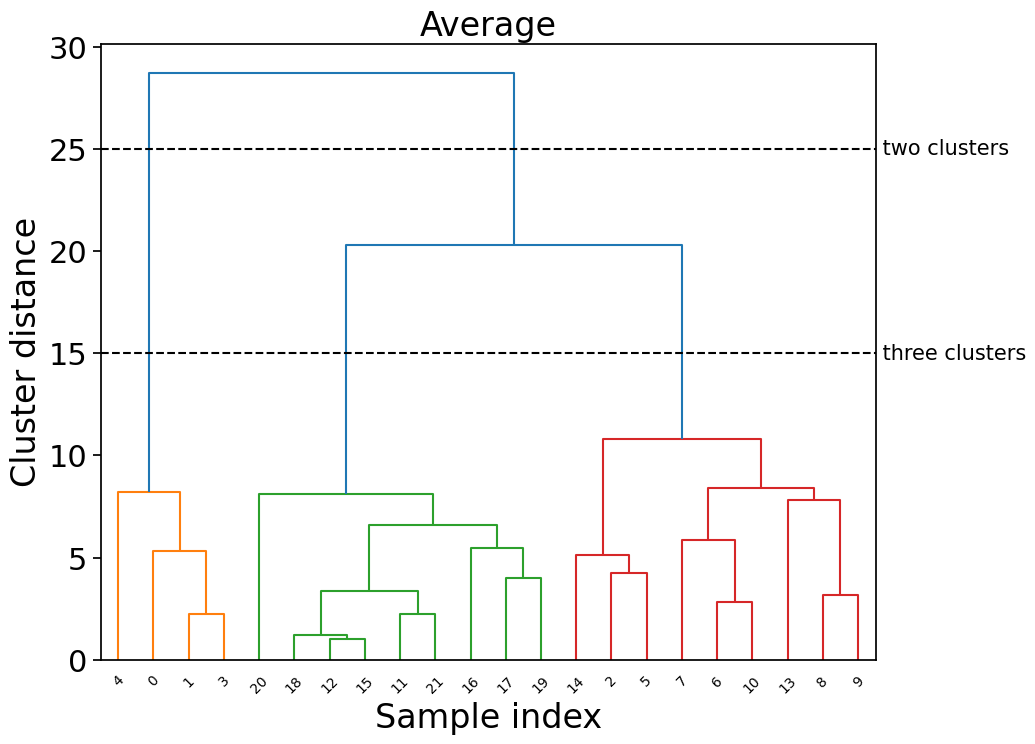

In [83]:
linkage_array = average(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [25, 25], '--', c='k')
ax.plot(bounds, [15, 15], '--', c='k')
ax.text(bounds[1], 25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 15, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

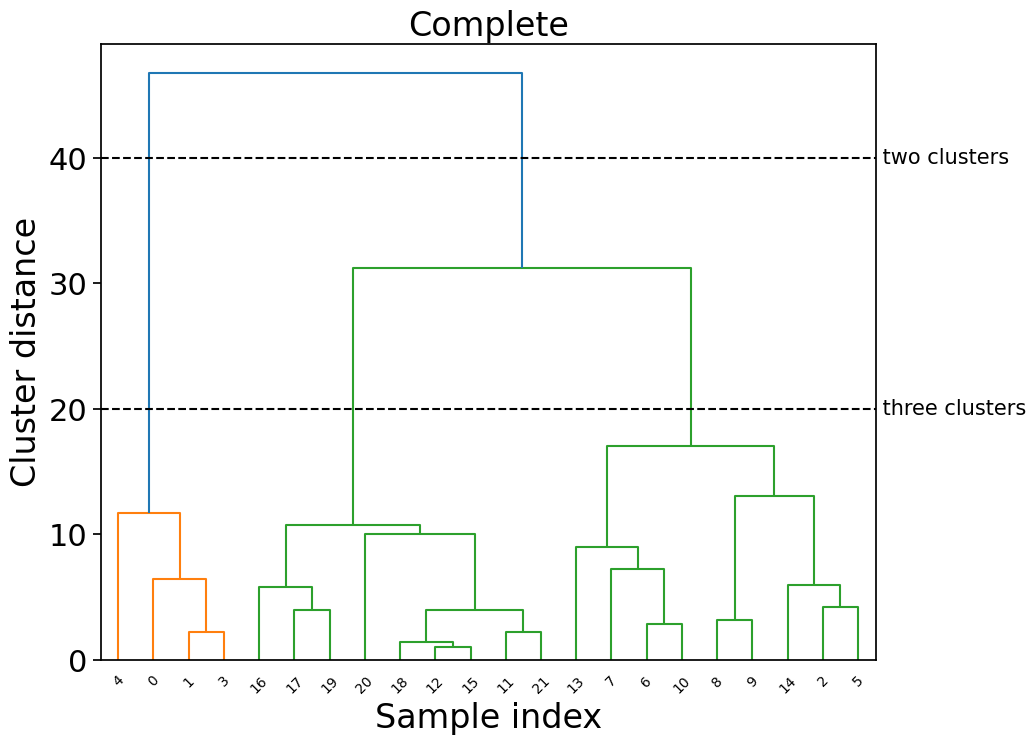

In [84]:
linkage_array = complete(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [40, 40], '--', c='k')
ax.plot(bounds, [20, 20], '--', c='k')
ax.text(bounds[1], 40, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 20, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

> ## Result Comparisson

In [85]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
df['ward'] = agg_ward.fit_predict(X)

agg_average = AgglomerativeClustering(n_clusters=3, linkage = 'average')
df['average'] = agg_average.fit_predict(X)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
df['complete'] = agg_complete.fit_predict(X)

In [ ]:
df

,tinggibadan,tinggibadanistri,ward,average,complete
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


> ## Scatter Plot and Clustering Result

Text(0, 0.5, 'Tinggi Badan Istri')

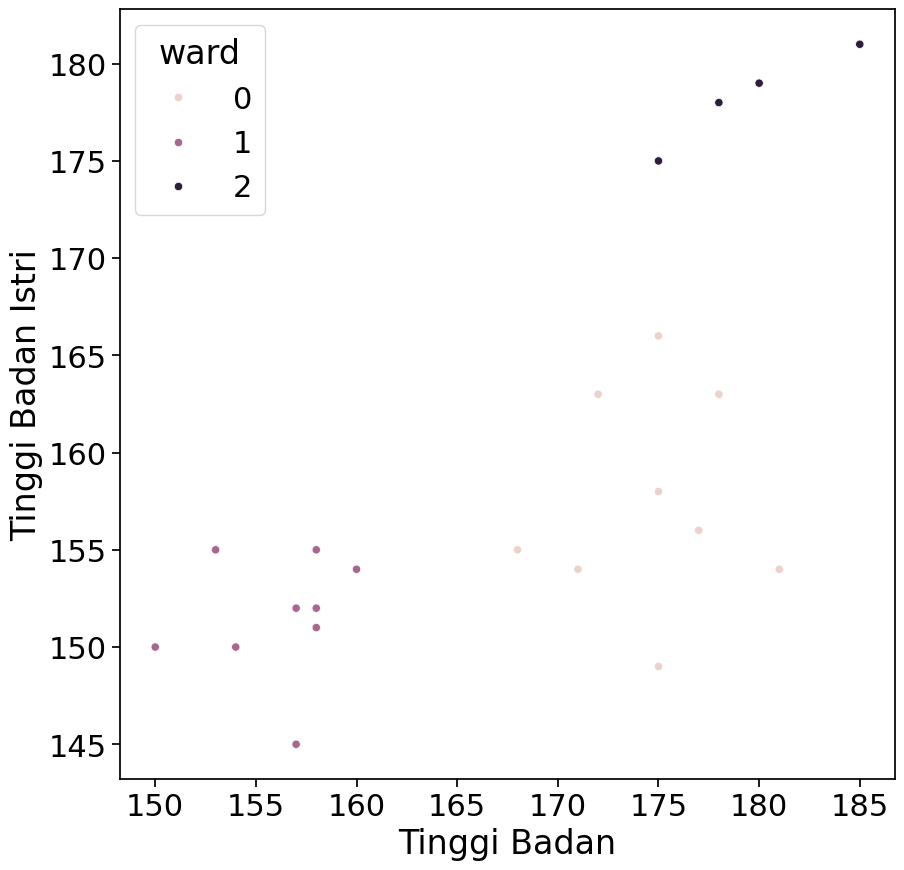

In [86]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    hue = 'ward',
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# Clustering DBSCAN

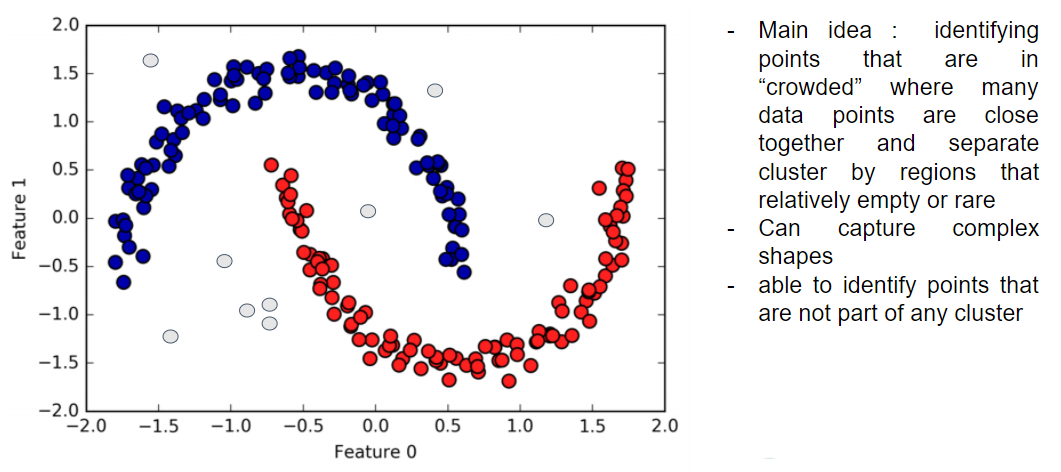

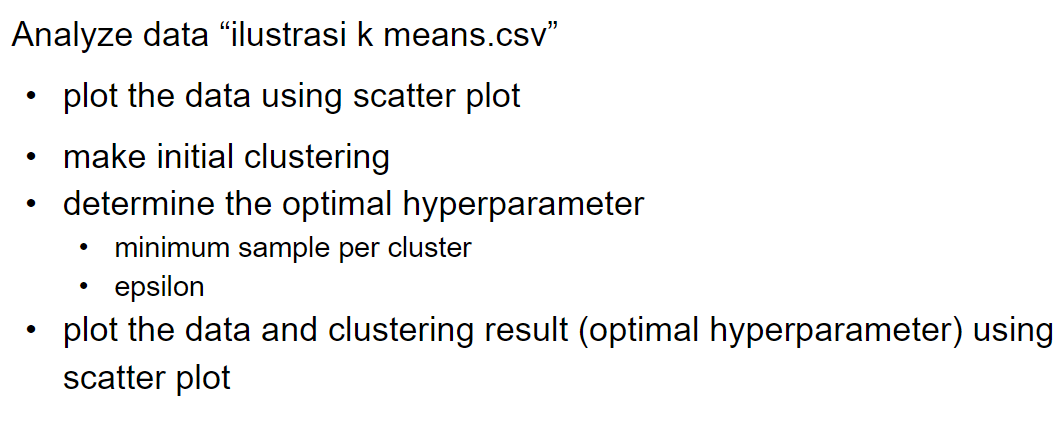

> ## Data

In [87]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [88]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


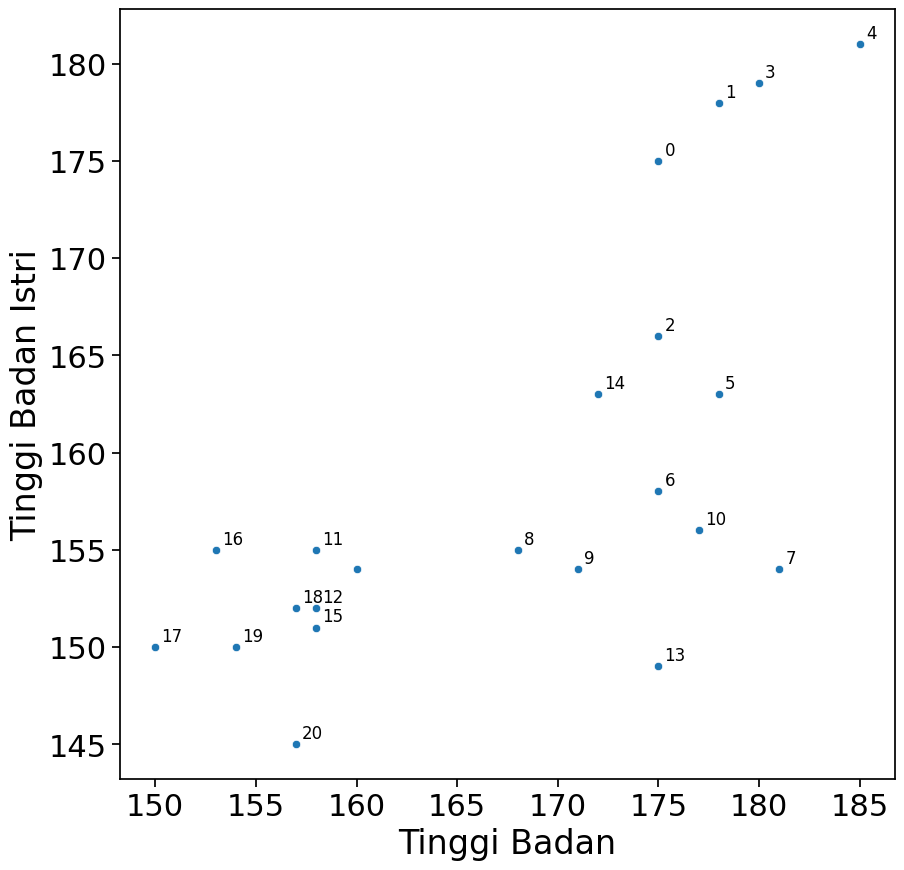

In [89]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0,df.shape[0]-1)):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize = 12)

> ## Initial Clustering

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
dbscan = DBSCAN(eps = 0.8, min_samples=6)
clusters = dbscan.fit_predict(X_scaled)

In [93]:
print(clusters)

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [94]:
silhouette_score(X_scaled, clusters)

np.float64(0.6161772649616482)

> ## Optimizing minimum samples and epsilon

In [95]:
for eps in [i/10 for i in range(6,8)]:
  for min_samples in range(4,6):
    print("\neps={}".format(eps))
    print("min_samples={}".format(min_samples))
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    silh = silhouette_score(X_scaled, labels)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))
    print("Silhouette Score: {}".format(silh))


eps=0.6
min_samples=4
Clusters present: [-1  0  1]
Cluster sizes: [7 6 9]
Silhouette Score: 0.3901682187136734

eps=0.6
min_samples=5
Clusters present: [-1  0  1]
Cluster sizes: [8 5 9]
Silhouette Score: 0.35497113213899967

eps=0.7
min_samples=4
Clusters present: [0 1 2]
Cluster sizes: [0 4 9 9]
Silhouette Score: 0.6161772649616482

eps=0.7
min_samples=5
Clusters present: [-1  0  1]
Cluster sizes: [4 9 9]
Silhouette Score: 0.6161772649616482


The best clustering result is clustering with hyperparameters eps = 0.7 and min_samples = 4 because no observation included into nois (easier to interpret) and the biggest silhouette score.

> ## Final Result

In [96]:
dbscan = DBSCAN(eps = 0.7, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [97]:
print(clusters)

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [98]:
df['clusters'] = clusters

Text(0, 0.5, 'Tinggi Badan Istri')

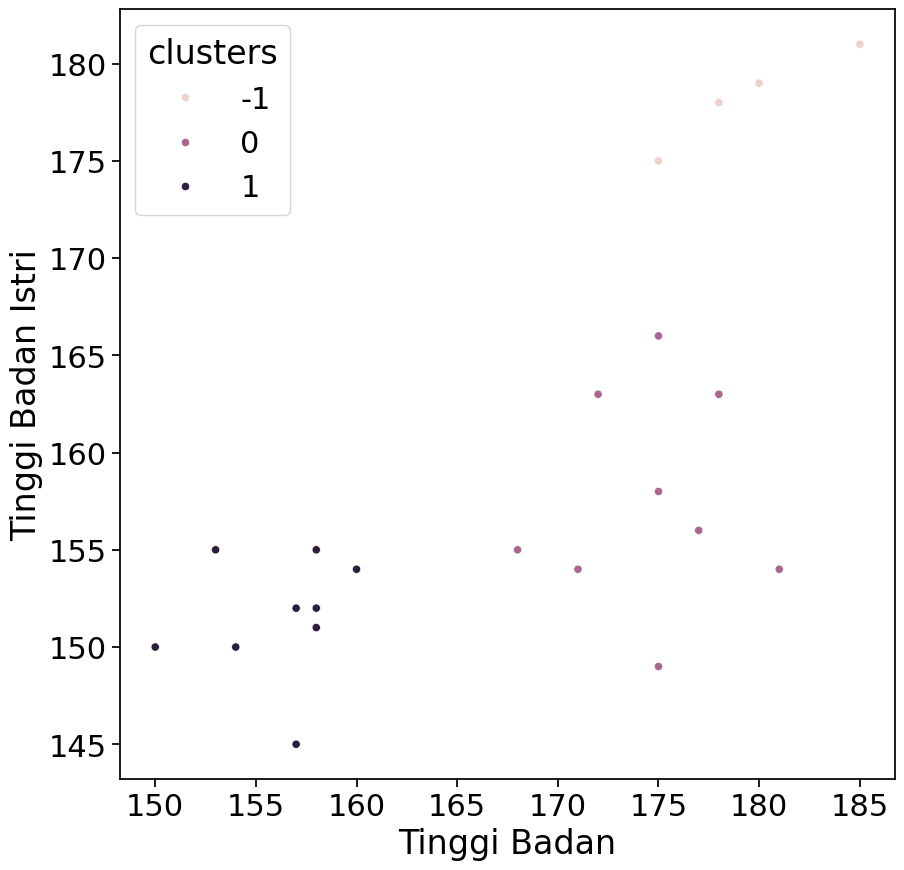

In [99]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    hue = 'clusters',
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')